# CLASE 8 - Visualizaciones en python II
### Coderhouse - Data Science
Profe Omar Muñoz

In [2]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("df_full_premierleague.csv", index_col=0)
df.head()

,link_match,season,date,home_team,away_team,result_full,result_ht,home_clearances,home_corners,home_fouls_conceded,...,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,sg_match_ht_acum_away,performance_acum_away
0,https://www.premierleague.com/match/7186,10/11,2010-11-01,Blackpool,West Bromwich Albion,2-1,1-0,15.0,8.0,16.0,...,20.0,584.9,1.6,1.44,1.67,-2.0,0.33,0.78,-4.0,55.6
1,https://www.premierleague.com/match/7404,10/11,2011-04-11,Liverpool,Manchester City,3-0,3-0,16.0,6.0,6.0,...,22.0,681.4,2.0,1.61,0.87,23.0,0.87,0.32,17.0,60.2
2,https://www.premierleague.com/match/7255,10/11,2010-12-13,Manchester United,Arsenal,1-0,1-0,26.0,5.0,9.0,...,21.2,748.0,1.8,2.12,1.12,16.0,0.94,0.38,9.0,66.7
3,https://www.premierleague.com/match/7126,10/11,2010-09-13,Stoke City,Aston Villa,2-1,0-1,26.0,8.0,12.0,...,25.0,567.3,2.0,1.33,2.00,-2.0,1.00,1.00,0.0,66.7
4,https://www.premierleague.com/match/7350,10/11,2011-02-14,Fulham,Chelsea,0-0,0-0,50.0,4.0,11.0,...,19.4,728.6,1.4,1.84,0.88,24.0,0.84,0.48,9.0,58.7


In [4]:
# Convertimos la columna date a formato fecha
df['date'] = pd.to_datetime(df['date'])
# Creamos una columna con los puntos por partido de local
df.home_points = 0
df.loc[df['goal_home_ft'] > df['goal_away_ft'], 'home_points'] = 3
df.loc[df['goal_home_ft'] == df['goal_away_ft'], 'home_points'] = 1
df.loc[df['goal_away_ft'] > df['goal_home_ft'], 'home_points'] = 0
# Creamos una columna con los puntos por partido de visitante
df.away_points = 3
df.loc[df['goal_home_ft'] > df['goal_away_ft'], 'away_points'] = 0
df.loc[df['goal_home_ft'] == df['goal_away_ft'], 'away_points'] = 1
df.loc[df['goal_away_ft'] > df['goal_home_ft'], 'away_points'] = 3
# Creamos una columna con los puntos por partido totales
df['total_points'] = df['home_points'] + df['away_points']

## Subplots

In [6]:
Arsenal = df[(  df['season']=='16/17')&
             (  ( df['home_team']=='Arsenal')|
                ( df['away_team']=='Arsenal')  ) ].sort_values(by="date")
Everton = df[(  df['season']=='16/17')&
               (( df['home_team']=='Everton')|
                ( df['away_team']=='Everton')  ) ].sort_values(by="date")

Text(0.5, 0, 'Fecha')

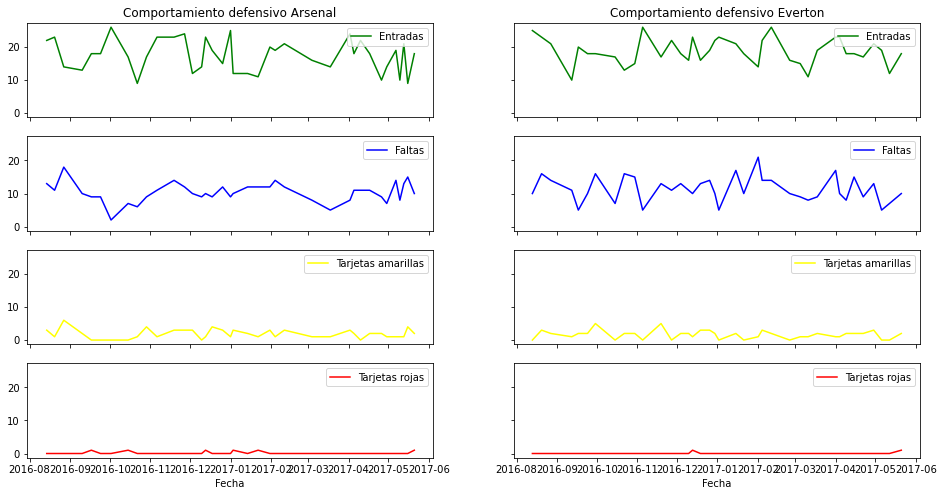

In [7]:
#sharex y sharey se usa para que compartan el eje x o el y según el caso
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(16, 8), sharex=True, sharey=True) 

# Graficos de la primera columna
ax[0, 0].plot(Arsenal['date'], Arsenal['home_tackles'], label='Entradas', color='green')
ax[1, 0].plot(Arsenal['date'], Arsenal['home_fouls_conceded'], label='Faltas', color='blue')
ax[2, 0].plot(Arsenal['date'], Arsenal['home_yellow_cards'], label='Tarjetas amarillas', color='yellow')
ax[3, 0].plot(Arsenal['date'], Arsenal['home_red_cards'], label='Tarjetas rojas', color='red')
ax[0, 0].legend(loc='upper right')  
ax[1, 0].legend()
ax[2, 0].legend()  
ax[3, 0].legend()
ax[0, 0].set_title('Comportamiento defensivo Arsenal') 
ax[3, 0].set_xlabel('Fecha') 


# Graficos de la segunda columna
ax[0, 1].plot(Everton['date'], Everton['home_tackles'], label='Entradas', color='green')
ax[1, 1].plot(Everton['date'], Everton['home_fouls_conceded'], label='Faltas', color='blue')
ax[2, 1].plot(Everton['date'], Everton['home_yellow_cards'], label='Tarjetas amarillas', color='yellow')
ax[3, 1].plot(Everton['date'], Everton['home_red_cards'], label='Tarjetas rojas', color='red')
ax[0, 1].legend(loc='upper right')  
ax[1, 1].legend()
ax[2, 1].legend()  
ax[3, 1].legend()
ax[0, 1].set_title('Comportamiento defensivo Everton') 
ax[3, 1].set_xlabel('Fecha')

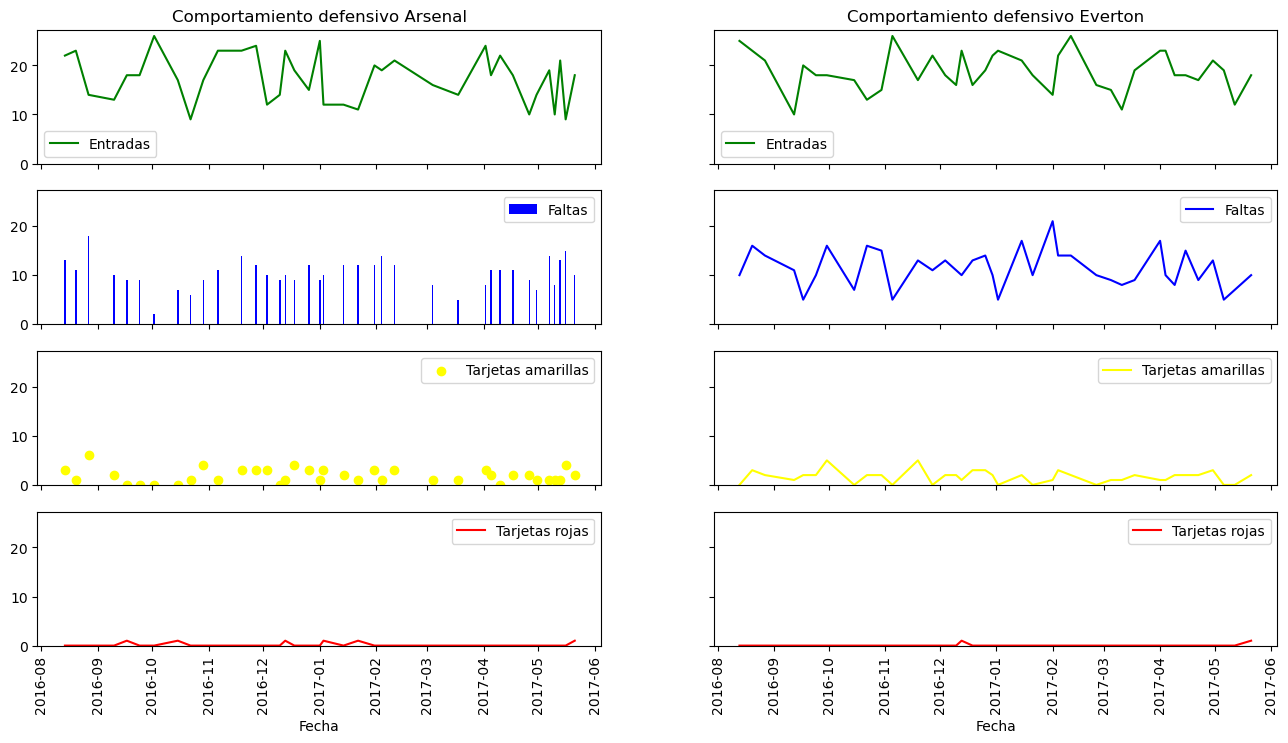

In [55]:
#sharex y sharey se usa para que compartan el eje x o el y según el caso
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(16, 8), sharex=True, sharey=True) 
#plt.xticks(rotation=90)
#ax[0,0].tick_params(axis='x', rotation=90)
#ax[1,0].tick_params(axis='x', rotation=90)
#ax[2,0].tick_params(axis='x', rotation=90)
#ax[3,0].tick_params(axis='x', rotation=90)

##ax[0,0].tick_params(axis='x', rotation=90)
#ax[0,1].tick_params(axis='x', rotation=90)
#ax[0,2].tick_params(axis='x', rotation=90)
#ax[0,3].tick_params(axis='x', rotation=90)
#ax.tick_params(axis='y', rotation=90)

#for tick in ax.get_xticklabels():
#    tick.set_rotation(45)
#plt.xticks(rotation=90)    
    
# Graficos de la primera columna
ax[0, 0].plot(Arsenal['date'], Arsenal['home_tackles'], label='Entradas', color='green')
ax[1, 0].bar(Arsenal['date'], Arsenal['home_fouls_conceded'], label='Faltas', color='blue')
ax[2, 0].scatter(Arsenal['date'], Arsenal['home_yellow_cards'], label='Tarjetas amarillas', color='yellow')
ax[3, 0].plot(Arsenal['date'], Arsenal['home_red_cards'], label='Tarjetas rojas', color='red')
ax[0, 0].legend(loc='best')  
ax[1, 0].legend(loc='best')
ax[2, 0].legend(loc='best')  
ax[3, 0].legend(loc='best')
ax[0, 0].set_title('Comportamiento defensivo Arsenal') 
ax[3, 0].set_xlabel('Fecha',rotation=0) 
ax[3, 0].tick_params(axis='x', rotation=90)


# Graficos de la segunda columna
ax[0, 1].plot(Everton['date'], Everton['home_tackles'], label='Entradas', color='green')
ax[1, 1].plot(Everton['date'], Everton['home_fouls_conceded'], label='Faltas', color='blue')
ax[2, 1].plot(Everton['date'], Everton['home_yellow_cards'], label='Tarjetas amarillas', color='yellow')
ax[3, 1].plot(Everton['date'], Everton['home_red_cards'], label='Tarjetas rojas', color='red')
ax[0, 1].legend(loc='best')  
ax[1, 1].legend(loc='best')
ax[2, 1].legend(loc='best')  
ax[3, 1].legend(loc='best')
ax[0, 1].set_title('Comportamiento defensivo Everton') 
ax[3, 1].set_xlabel('Fecha',rotation=0) 
ax[3, 1].tick_params(axis='x', rotation=90)




# Personalizando Matplotlib

In [30]:
mpl.rcParams.keys() # ver los parametros por defecto

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.gri

In [31]:
# Seleccionamos las variables de posesión y pases en las temporadas de Guardiola
guardiola = ['16/17', '17/18', '18/19'] # lista para realizar filtro
posesion_g = df[(df['season'].isin(guardiola))&(df['home_team']=='Manchester City')]['home_possession']
pases_g = df[(df['season'].isin(guardiola))&(df['home_team']=='Manchester City')]['home_passes']
# Seleccionamos las variables de posesión y pases en las temporadas de Pellegrini
pellegrini = ['13/14', '14/15', '15/16']
posesion_p = df[(df['season'].isin(pellegrini))&(df['home_team']=='Manchester City')]['home_possession']
pases_p = df[(df['season'].isin(pellegrini))&(df['home_team']=='Manchester City')]['home_passes']

### Veamos un gráfico con los valores por defecto

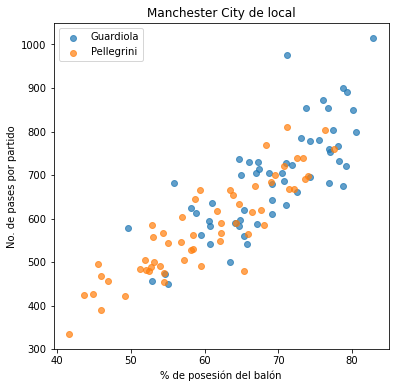

In [32]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(posesion_g, pases_g, alpha=0.7)
ax.scatter(posesion_p, pases_p, alpha=0.7)
ax.set_title('Manchester City de local')
ax.set_xlabel('% de posesión del balón')
ax.set_ylabel('No. de pases por partido')
ax.legend(['Guardiola', 'Pellegrini'], loc='upper left')

### Editemos algunos valores

In [33]:
mpl.rcParams['axes.titleweight'] = 'bold' # negrita del título
mpl.rcParams['axes.titlelocation'] = 'left' # alineación del título
mpl.rcParams['axes.titlecolor'] = 'firebrick' # color del título
mpl.rcParams['axes.labelcolor'] = 'blue' # color de los etiquetas de los ejes
mpl.rcParams['axes.labelsize'] = '10'  # tamaño de las etiquetas de los ejes
mpl.rcParams['axes.labelweight'] = 'light' # letra delgada
mpl.rcParams['axes.linewidth'] = '1' # ancho de las líneas
mpl.rcParams['axes.grid'] = True # grilla en el gráfico
mpl.rcParams['grid.color'] = 'grey' # color de la grilla 
mpl.rcParams['grid.linestyle'] = '--' # estilo de la grilla
mpl.rcParams['grid.linewidth'] = '1' # ancho de la línea de la grilla

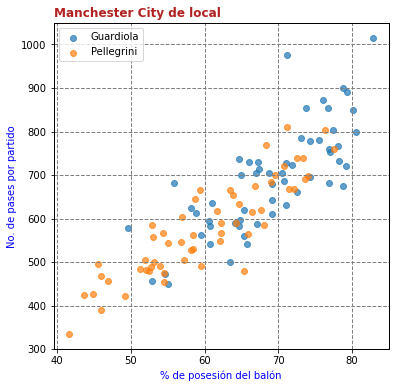

In [34]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(posesion_g, pases_g, alpha=0.7)
ax.scatter(posesion_p, pases_p, alpha=0.7)
ax.set_title('Manchester City de local')
ax.set_xlabel('% de posesión del balón')
ax.set_ylabel('No. de pases por partido')
ax.legend(['Guardiola', 'Pellegrini'], loc='upper left')

### Restablescamos los valores por defecto

In [35]:
mpl.rcParams.update(mpl.rcParamsDefault)

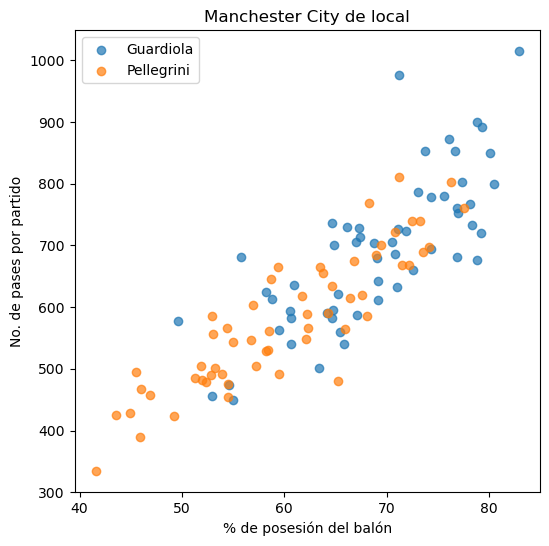

In [36]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(posesion_g, pases_g, alpha=0.7)
ax.scatter(posesion_p, pases_p, alpha=0.7)
ax.set_title('Manchester City de local')
ax.set_xlabel('% de posesión del balón')
ax.set_ylabel('No. de pases por partido')
ax.legend(['Guardiola', 'Pellegrini'], loc='upper left')

### Otra forma de editarlos

In [56]:
plt.rc('axes', titlelocation='left', titlecolor='firebrick', labelcolor='blue', grid=True)

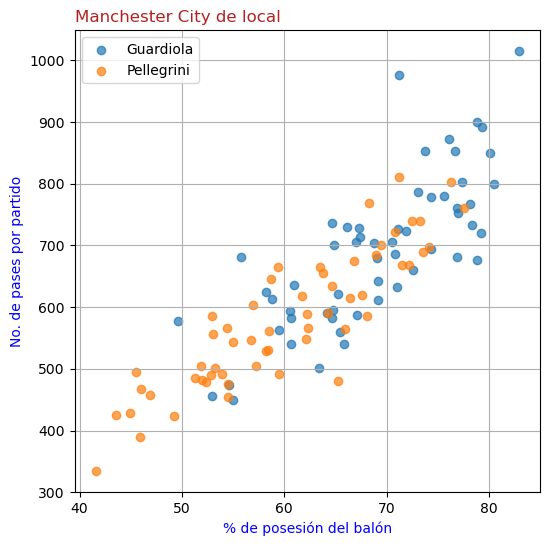

In [57]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(posesion_g, pases_g, alpha=0.7)
ax.scatter(posesion_p, pases_p, alpha=0.7)
ax.set_title('Manchester City de local')
ax.set_xlabel('% de posesión del balón')
ax.set_ylabel('No. de pases por partido')
ax.legend(['Guardiola', 'Pellegrini'], loc='upper left')

# Seaborn

In [82]:
mpl.rcParams.update(mpl.rcParamsDefault)
sns.set()

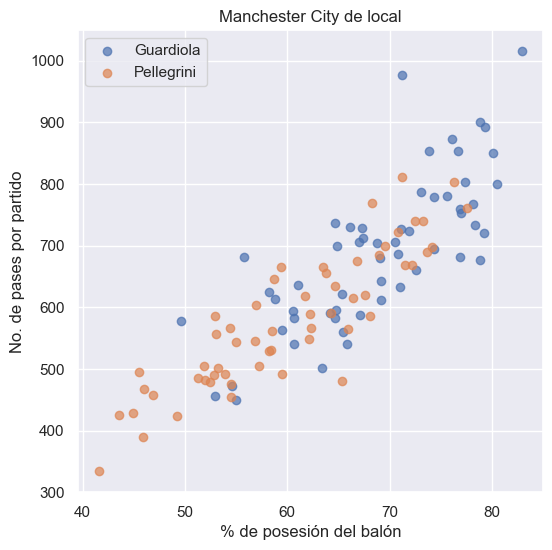

In [59]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(posesion_g, pases_g, alpha=0.7)
ax.scatter(posesion_p, pases_p, alpha=0.7)
ax.set_title('Manchester City de local')
ax.set_xlabel('% de posesión del balón')
ax.set_ylabel('No. de pases por partido')
ax.legend(['Guardiola', 'Pellegrini'], loc='upper left')

## Veamos algunos de los gráficos numéricos más interesantes con seaborn

<AxesSubplot:>

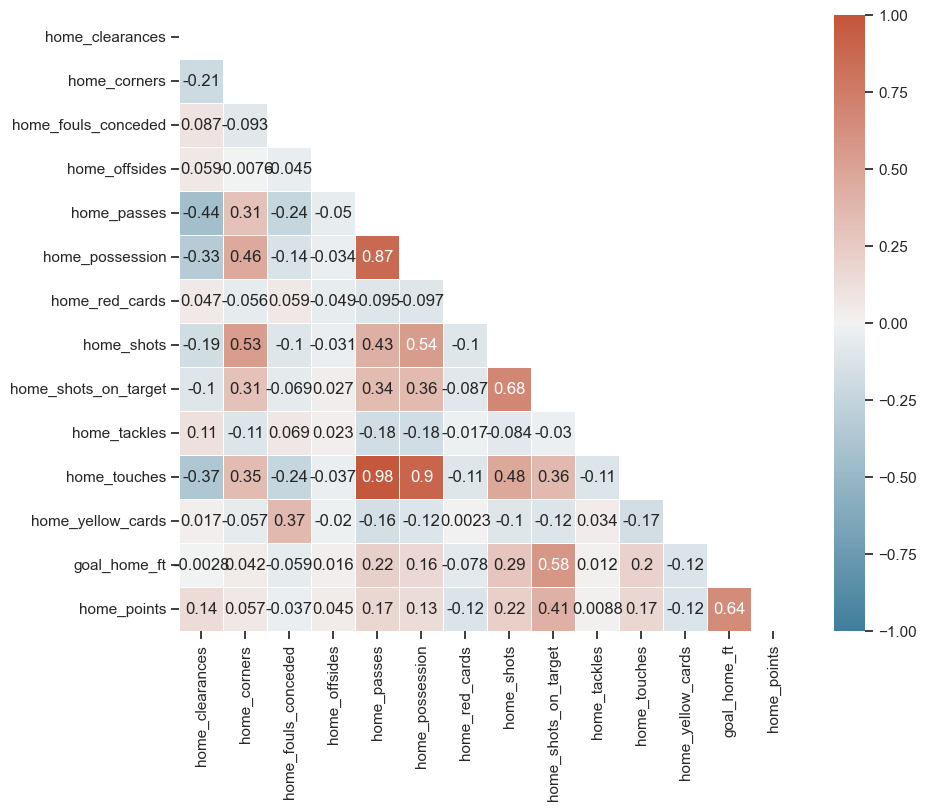

In [60]:
sns.set(style="ticks")
corr = df[['home_clearances', 'home_corners', 'home_fouls_conceded',
           'home_offsides', 'home_passes', 'home_possession', 'home_red_cards',
           'home_shots', 'home_shots_on_target', 'home_tackles', 'home_touches',
           'home_yellow_cards','goal_home_ft', 'home_points']].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,
            center=0, vmax=1, vmin=-1,
            square=True, linewidths=.5, annot=True)
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

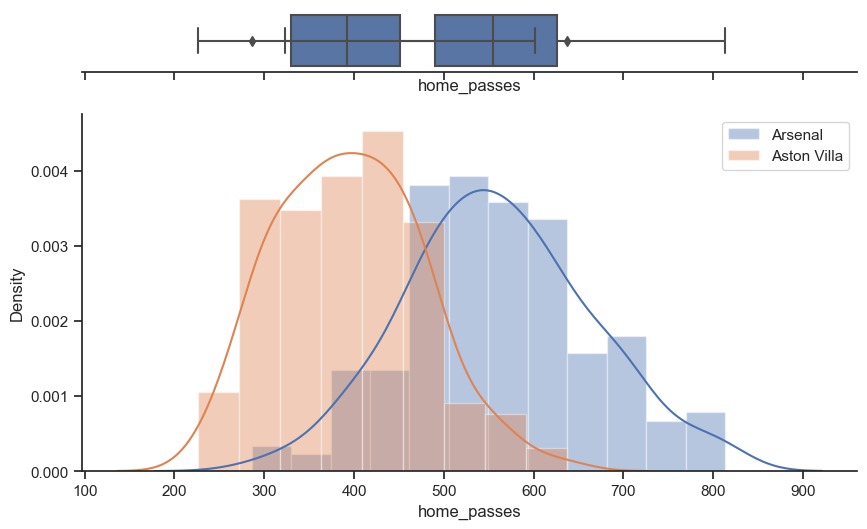

In [61]:
import warnings
warnings.filterwarnings("ignore")

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df[df['home_team']=='Arsenal']['home_passes'], ax=ax_box) # boxplot es diagrama de cajas
sns.boxplot(df[df['home_team']=='Aston Villa']['home_passes'], ax=ax_box)
sns.distplot(df[df['home_team']=='Arsenal']['home_passes'], ax=ax_hist, label='Arsenal')
sns.distplot(df[df['home_team']=='Aston Villa']['home_passes'], ax=ax_hist, label='Aston Villa')
ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)
ax_hist.legend()

In [64]:
# Seleccionamos las variables de posesión y pases en las temporadas de Guardiola
guardiola = ['16/17', '17/18', '18/19'] # lista para realizar filtro
pellegrini = ['13/14', '14/15', '15/16']
df_2 = df[((df['season'].isin(guardiola))|(df['season'].isin(pellegrini)))&(df['home_team']=='Manchester City')]
# Creamos una nueva variable de texto para poner el nombre del técnico
df_2['tecnico'] = ""
df_2.loc[(df['season'].isin(guardiola)), 'tecnico'] = 'Guardiola'
df_2.loc[(df['season'].isin(pellegrini)), 'tecnico'] = 'Pellegrini'

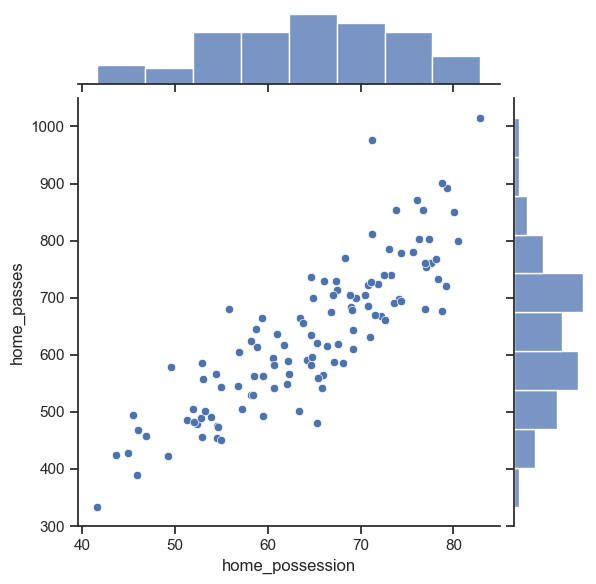

In [76]:
g = sns.jointplot(x='home_possession', y='home_passes', data=df_2, palette="tab10")
g.fig.set_figwidth(6)
g.fig.set_figheight(6)
# https://seaborn.pydata.org/generated/seaborn.jointplot.html
#hue="tecnico", separa informacion en categorias 

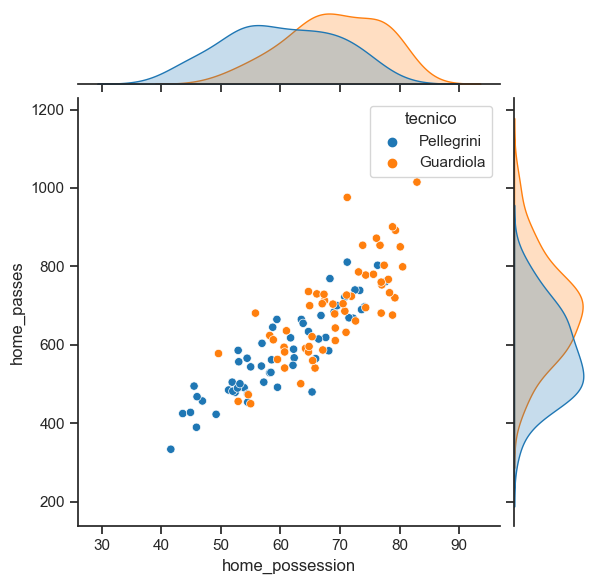

In [77]:
g = sns.jointplot(x='home_possession', y='home_passes', data=df_2, hue="tecnico", palette="tab10")
g.fig.set_figwidth(6)
g.fig.set_figheight(6)
# https://seaborn.pydata.org/generated/seaborn.jointplot.html
#hue="tecnico", separa informacion en categorias 

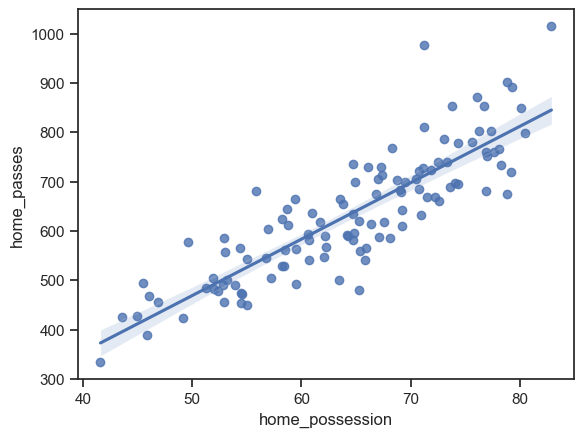

In [66]:
ax = sns.regplot(x='home_possession', y='home_passes', data=df_2)
# https://seaborn.pydata.org/generated/seaborn.regplot.html

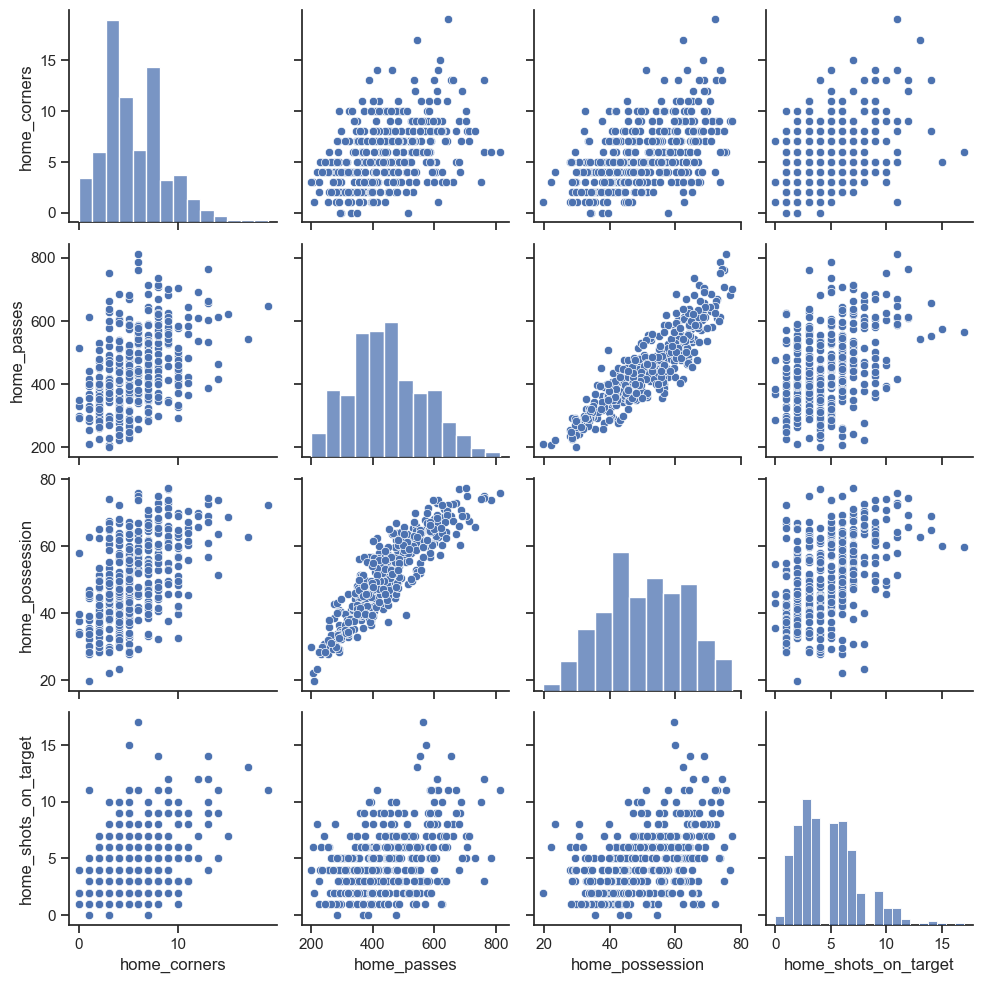

In [78]:
df_3 = df[df['season']=='16/17'][['home_corners', 'home_passes',
                                  'home_possession', 'home_shots_on_target']]
sns.pairplot(df_3, diag_kind="hist")
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

## Volvamos con el material de coder

In [86]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [90]:
df_ejercicio = sns.load_dataset('exercise')
df_ejercicio

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


In [91]:
df_ejercicio = df_ejercicio.drop('Unnamed: 0', axis='columns') # drop = eliminar, se elimina la columna Unnamed
df_ejercicio.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


In [92]:
df_30_min = df_ejercicio[df_ejercicio['time'] == '30 min']
df_30_min.head()

,id,diet,pulse,time,kind
2,1,low fat,88,30 min,rest
5,2,low fat,93,30 min,rest
8,3,low fat,94,30 min,rest
11,4,low fat,83,30 min,rest
14,5,low fat,91,30 min,rest


In [99]:
df_30_min.shape

(30, 5)

<Figure size 640x480 with 0 Axes>

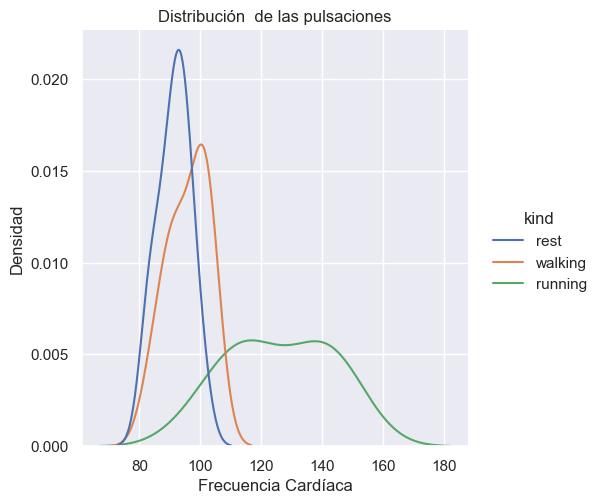

In [100]:
plt.figure()
ax = sns.displot(data=df_30_min, x='pulse', kind='kde', hue='kind', fill=False) #fill rellena el grafico
ax.set(xlabel='Frecuencia Cardíaca', ylabel='Densidad', title='Distribución  de las pulsaciones')

<Figure size 640x480 with 0 Axes>

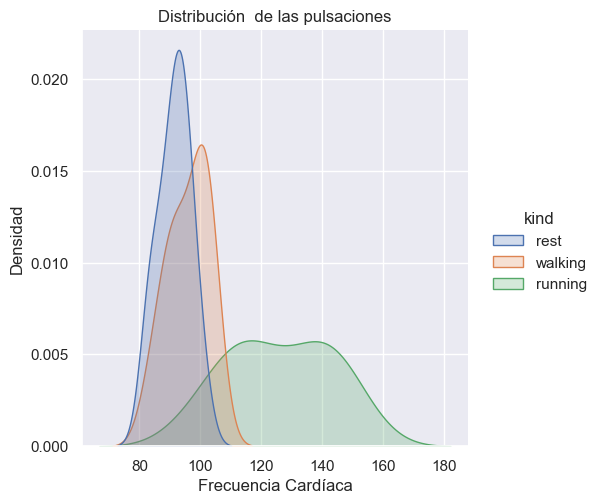

In [96]:
plt.figure()
ax = sns.displot(data=df_30_min, x='pulse', kind='kde', hue='kind', fill=True)
ax.set(xlabel='Frecuencia Cardíaca', ylabel='Densidad', title='Distribución  de las pulsaciones')

<Figure size 640x480 with 0 Axes>

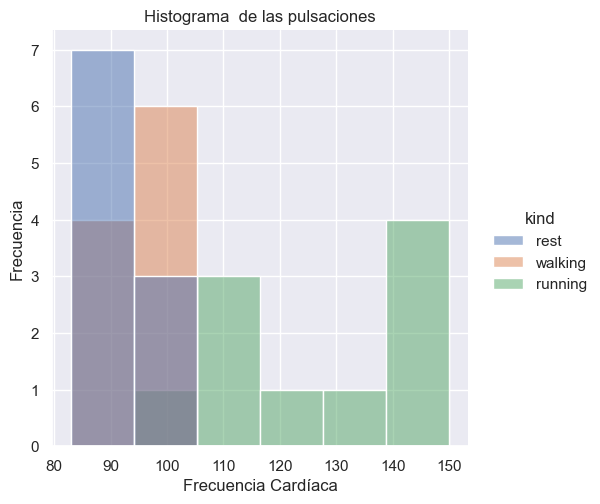

In [102]:
plt.figure()
ax = sns.displot(data=df_30_min, x='pulse', kind='hist', hue='kind', fill=True)
ax.set(xlabel='Frecuencia Cardíaca', ylabel='Frecuencia', title='Histograma  de las pulsaciones')

<Figure size 640x480 with 0 Axes>

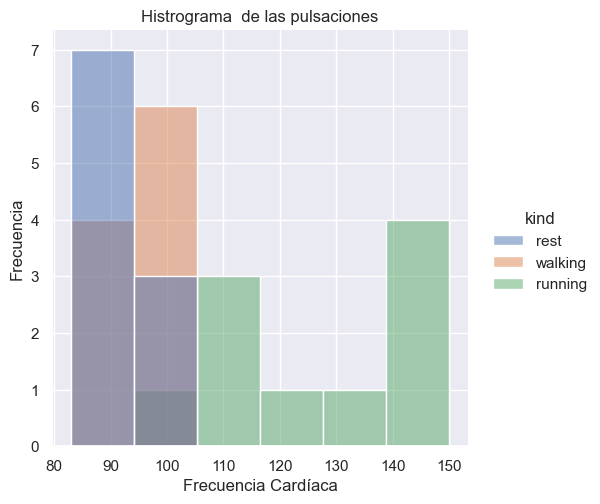

In [103]:
#Densidad en y para kind = kde ( tipo de grafico )
#Frecuencia en y para kind = hist ( tipo de grafico )
plt.figure()
ax = sns.displot(data=df_30_min, x='pulse', kind='hist', hue='kind', fill=True)
ax.set(xlabel='Frecuencia Cardíaca', ylabel='Frecuencia', title='Histrograma  de las pulsaciones')

<Figure size 640x480 with 0 Axes>

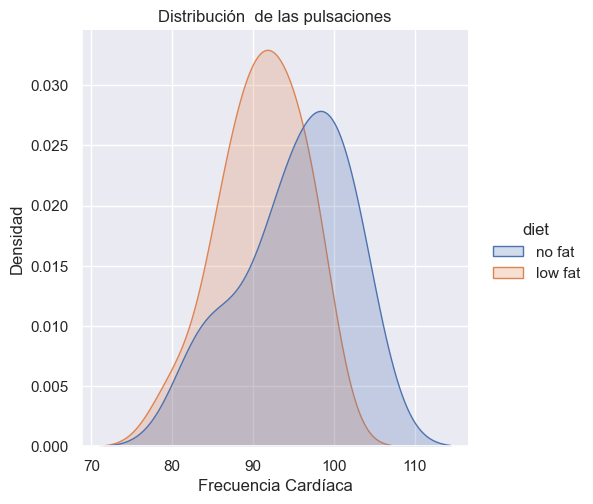

In [106]:
#filtrar los datos
df_1_min = df_ejercicio[df_ejercicio['time'] == '1 min']
#graficando
plt.figure()
ax = sns.displot(data=df_1_min, x='pulse', kind='kde', hue='diet', fill=True)
ax.set(xlabel='Frecuencia Cardíaca', ylabel='Densidad', title='Distribución  de las pulsaciones')

<Figure size 640x480 with 0 Axes>

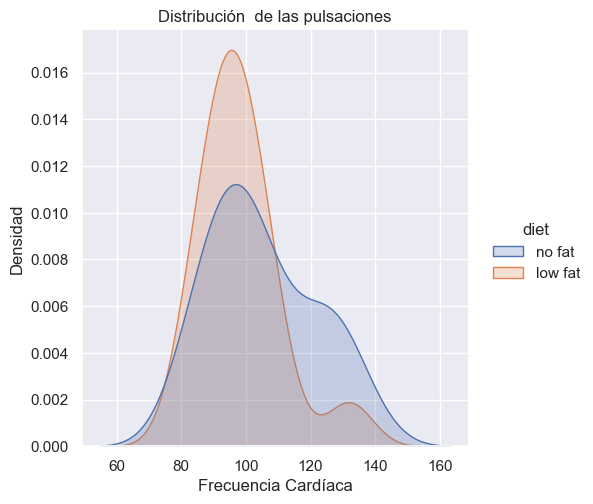

In [104]:
#filtrar los datos
df_15_min = df_ejercicio[df_ejercicio['time'] == '15 min']
#graficando
plt.figure()
ax = sns.displot(data=df_15_min, x='pulse', kind='kde', hue='diet', fill=True)
ax.set(xlabel='Frecuencia Cardíaca', ylabel='Densidad', title='Distribución  de las pulsaciones')

<Figure size 640x480 with 0 Axes>

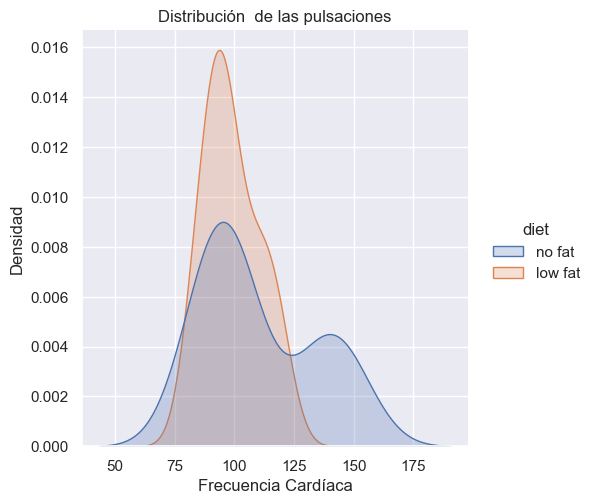

In [105]:
#filtrar los datos
df_30_min = df_ejercicio[df_ejercicio['time'] == '30 min']
#graficando
plt.figure()
ax = sns.displot(data=df_30_min, x='pulse', kind='kde', hue='diet', fill=True)
ax.set(xlabel='Frecuencia Cardíaca', ylabel='Densidad', title='Distribución  de las pulsaciones')

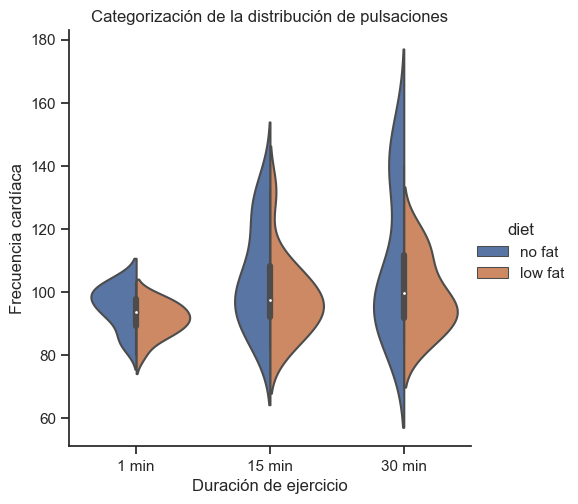

In [75]:
ax = sns.catplot(data=df_ejercicio, kind='violin', x='time', y='pulse', hue='diet', split=True)
ax.set(xlabel='Duración de ejercicio', ylabel='Frecuencia cardíaca', title='Categorización de la distribución de pulsaciones')
# https://seaborn.pydata.org/generated/seaborn.catplot.html

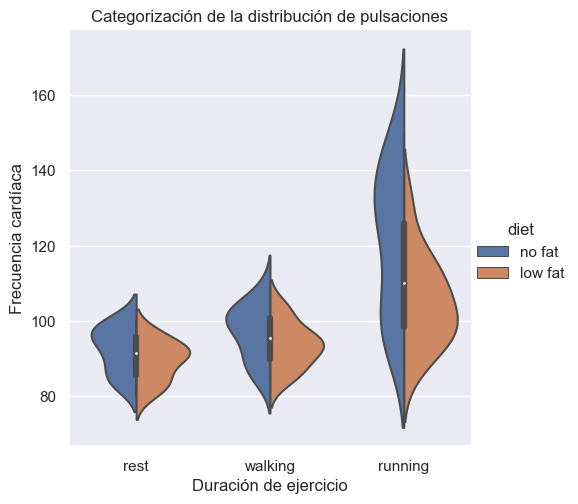

In [107]:
ax = sns.catplot(data=df_ejercicio, kind='violin', x='kind', y='pulse', hue='diet', split=True)
ax.set(xlabel='Duración de ejercicio', ylabel='Frecuencia cardíaca', title='Categorización de la distribución de pulsaciones')

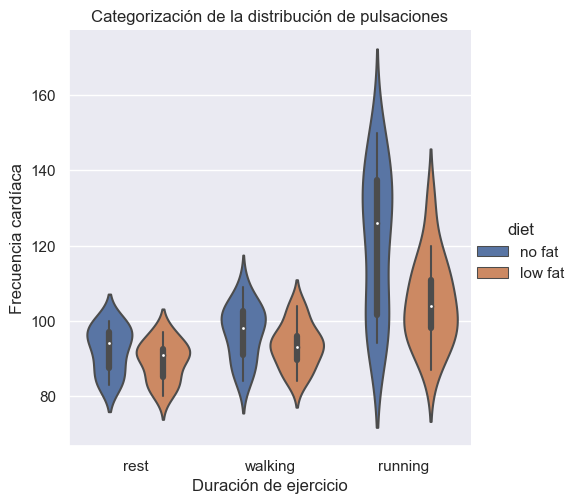

In [108]:
ax = sns.catplot(data=df_ejercicio, kind='violin', x='kind', y='pulse', hue='diet', split=False) # no integra la distribucion
ax.set(xlabel='Duración de ejercicio', ylabel='Frecuencia cardíaca', title='Categorización de la distribución de pulsaciones')